# PyData tour



- `pandas` and `numpy` are the primary libraries used for data analysis in Python
- `pd` and `np` are the conventional Python namespaces used; it is strongly recommended you do the same


In [1]:
import pandas as pd
import numpy as np


- `matplotlib` and `seaborn` are the most popular static data viz libraries in Python
- Again it is strongly recommended you use the `plt` and `sns` namespaces for both!


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Load a data set example: 

In [4]:
# url="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv"

# df = pd.read_csv(url)
# df.head()

df = sns.load_dataset("iris")

In [5]:
df.shape

(150, 5)

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Selecting values

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
df[['sepal_length']].iloc[:2]

,sepal_length
0,5.1
1,4.9


In [9]:
df[['sepal_length', 'sepal_width']].iloc[:2]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0


## Selecting values continued

In [10]:
df[df.sepal_length>5].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa


In [11]:
df[df.species=="setosa"].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## NumPy Arrays

In [12]:
sepal_len = df.sepal_length.values
petal_len = df.petal_length.values

In [13]:
sepal_len.shape

(150,)

In [14]:
np.mean(sepal_len), np.median(sepal_len)

(5.843333333333334, 5.8)

In [15]:
sepal_len[:5]

array([5.1, 4.9, 4.7, 4.6, 5. ])

## Broadcasting

In [16]:
diffs = np.abs(sepal_len[:,np.newaxis] - sepal_len[np.newaxis,:])
diffs.shape

(150, 150)

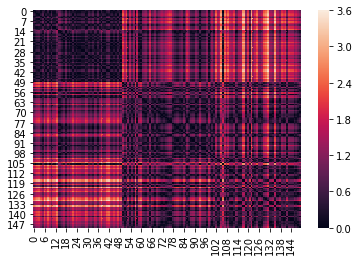

In [17]:
sns.heatmap(diffs);

In [18]:
%%timeit
diffs = np.abs(sepal_len[:,np.newaxis] - sepal_len[np.newaxis,:])

37.4 µs ± 1.39 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [19]:
%%timeit
diffs = np.zeros((150,150))

for i in range(150):
    for j in range(150):
        diffs[i,j] = np.abs(sepal_len[i] - sepal_len[j])

35.6 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Matplotlib : MATLAB-style API

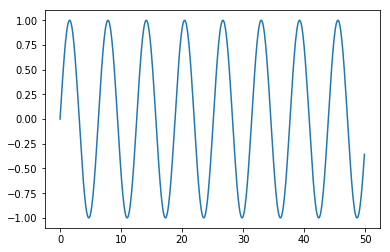

In [20]:
x = np.arange(0,50, .1)
plt.plot(x, np.sin(x))

## Matplotlib : MATLAB-style API

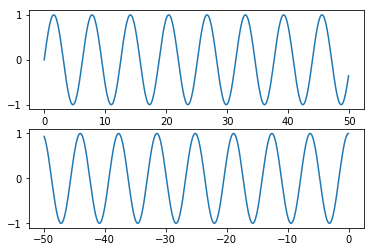

In [21]:
plt.figure()  # create a plot figure


# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(-x, np.cos(x));

## Matplotlib: Object Oriented API

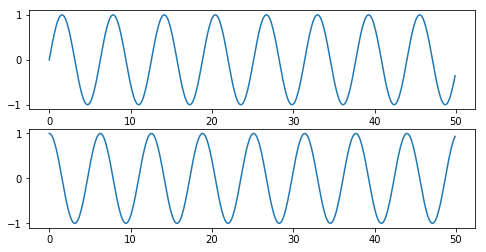

In [22]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2, figsize=(8,4))

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

## Seaborn overview


In [23]:

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

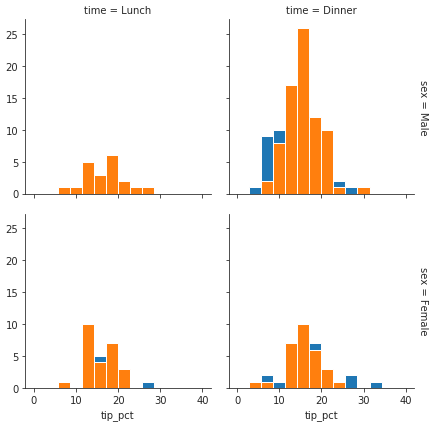

In [25]:

with sns.axes_style(style='ticks'):
    grid = sns.FacetGrid(tips, row="sex", col="time", hue= "smoker", 
                         margin_titles=True)
    grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

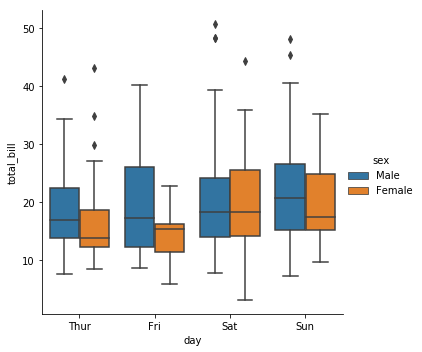

In [28]:

g = sns.catplot("day", "total_bill", "sex", data=tips, kind="box")


## feature engineering example

In [29]:
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.1, noise=.05)

In [30]:
df_X = pd.DataFrame(X, columns = ["f1", "f2"])
df_X["f3"] = df_X.f1**2 + df_X.f2**2

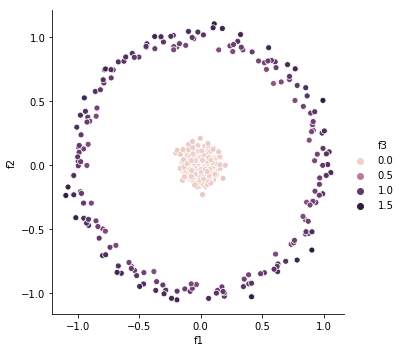

In [31]:
sns.relplot(x = "f1", y = "f2", hue = "f3", data = df_X);